**FADHLUROHMAN AL FARABI**

**TI-3E**

**ABSEN 12**

**PRAKTIKUM 1**

LANGKAH 1 - IMPORT LIBRARY

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

LANGKAH 2 - LOAD DATA DAN VISUALISASI

In [54]:
from google.colab import files
uploaded = files.upload()

Saving Iris.csv to Iris (3).csv


In [73]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


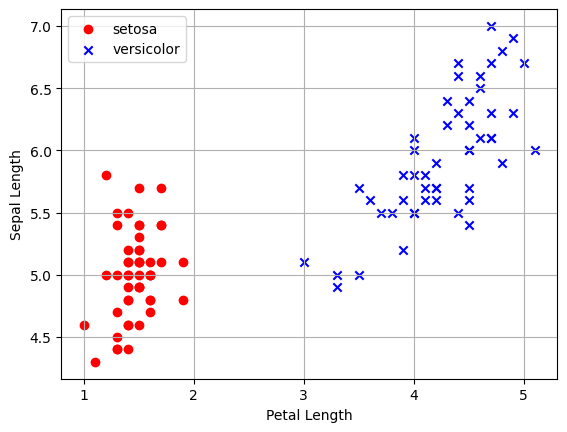

In [74]:
# Separate the species for plotting
setosa = df[df['Species'] == 'Iris-setosa']
versicolor = df[df['Species'] == 'Iris-versicolor']

# Scatter plot with correct column indexing (0: SepalLengthCm, 2: PetalLengthCm)
a, b = 'PetalLengthCm', 'SepalLengthCm'
plt.scatter(setosa[a], setosa[b], color='red', marker='o', label='setosa')
plt.scatter(versicolor[a], versicolor[b], color='blue', marker='x', label='versicolor')

plt.xlabel('Petal Length')
plt.ylabel('Sepal Length')
plt.legend(loc='upper left')
plt.grid()
plt.show()

LANGKAH 3 - MEMBUAT KELAS PERCEPTRON

In [75]:
# Define Perceptron class
class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[0] += update
                self.w_[1:] += update * xi
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

LANGKAH 4 - PILIH DATA DAN ENCODING LABEL

In [76]:
# Preprocess the data
y = df.iloc[0:100, 5].values  # Species column
y = np.where(y == 'Iris-setosa', -1, 1)  # Replace labels with -1 and 1
X = df.iloc[0:100, [1, 3]].values  # Select SepalLengthCm and PetalLengthCm


LANGKAH 5 - FITTING MODEL

In [77]:
# Train the perceptron model
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

LANGKAH 6 - VISUALISASI NILAI ERROR PADA EPOCH

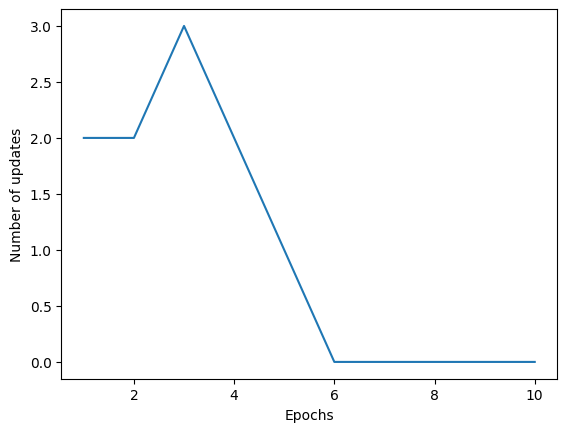

In [78]:
# Plot number of updates vs epochs
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_)
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

LANGKAH 7 - VISUALISASI DECISION BOUNDARY

<ipython-input-79-cc6655702433>:21: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(i), marker=markers[i], label=cl)


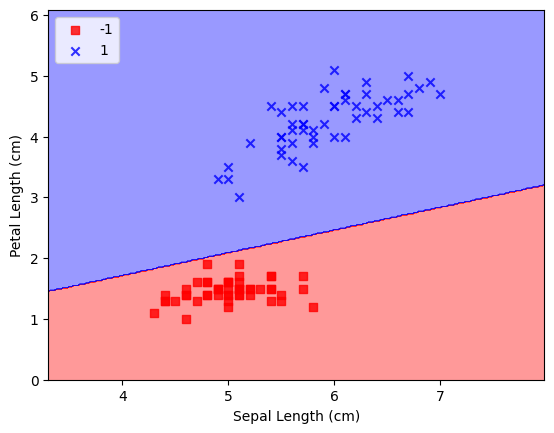

In [79]:
# Function to plot decision regions
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('r', 'b', 'g', 'k', 'grey')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))

    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for i, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(i), marker=markers[i], label=cl)

# Plot decision boundary for the perceptron
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.legend(loc='upper left')
plt.show()

**PRAKTIKUM 2**

LANGKAH 1 - IMPORT LIBRARY

In [ ]:
from sklearn.datasets import fetch_20newsgroups # download dataset
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Perceptron
from sklearn.metrics import f1_score, classification_report

LANGKAH 2 - PILIH LABEL DAN SPLIT DATA

In [ ]:
categories = ['rec.sport.hockey', 'rec.sport.baseball', 'rec.autos']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, remove=('headers', 'footers', 'quotes'))
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, remove=('headers', 'footers', 'quotes'))

LANGKAH 3 - EKSTRAK FITUR DAN BUAT MODEL PERCEPTRON

In [ ]:
# Ekstrak Fitur
vectorizer = TfidfVectorizer()

# Fit fitur
X_train = vectorizer.fit_transform(newsgroups_train.data)
X_test = vectorizer.transform(newsgroups_test.data)

# Fit Model
clf = Perceptron(random_state=11)
clf.fit(X_train, newsgroups_train.target)

# Prediksi
predictions = clf.predict(X_test)
print(classification_report(newsgroups_test.target, predictions))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       396
           1       0.82      0.83      0.83       397
           2       0.88      0.87      0.87       399

    accuracy                           0.86      1192
   macro avg       0.86      0.86      0.86      1192
weighted avg       0.86      0.86      0.86      1192



**PRAKTIKUM 3**

LANGKAH 1 - IMPORT LIBRARY

In [ ]:
from sklearn.neural_network import MLPClassifier

LANGKAH 2 - BUAT DATA

In [ ]:
y = [0, 1, 1, 0] # label
X = [[0, 0], [0, 1], [1, 0], [1, 1]] # data

LANGKAH 3 - FIT MODEL

In [ ]:
# Fit model
clf = MLPClassifier(solver='lbfgs', activation='logistic', hidden_layer_sizes=(2,), max_iter=100, random_state=20)
clf.fit(X, y)

MLPClassifier(activation='logistic', hidden_layer_sizes=(2,), max_iter=100,
              random_state=20, solver='lbfgs')

LANGKAH 4 - PREDIKSI

In [ ]:
pred = clf.predict(X)
print('Accuracy: %s' % clf.score(X, y))
for i,p in enumerate(pred[:10]):
    print('True: %s, Predicted: %s' % (y[i], p))

Accuracy: 1.0
True: 0, Predicted: 0
True: 1, Predicted: 1
True: 1, Predicted: 1
True: 0, Predicted: 0


**PRAKTIKUM 4**

PRA PENGOLAHAN DATA

LANGKAH 1 - IMPORT LIBRARY

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf

LANGKAH 2 - LOAD DATA

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Churn_Modelling.csv to Churn_Modelling.csv


In [ ]:
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

CEK DATA (X)

In [ ]:
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


LANGKAH 3 - ENCODING DATA KATEGORIKAL

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

In [ ]:
print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


LANGKAH 4 - ENCODING KOLOM "GEOGRAPHY" DENGAN ONE HOT ENCODER

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [ ]:
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


LANGKAH 5 - SPLIT DATA

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

LANGKAH 6 - SCALING FITUR

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

MEMBUAT MODEL ANN

LANGKAH 1 - INISIASI MODEL ANN

In [ ]:
ann = tf.keras.models.Sequential()

LANGKAH 2 - MEMBUAT INPUT LAYER DAN HIDDEN LAYER PERTAMA

In [ ]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

LANGKAH 3 - MEMBUAT HIDDEN LAYER KEDUA

In [ ]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

LANGKAH 4 - MEMBUAT OUTPUT LAYER

In [ ]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

TRAINING MODEL

LANGKAH 1 - COMPILE MODEL (MENYATUKAN ARSITEKTUR ANN)

In [ ]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

LANGKAH 2 - FITTING MODEL

In [ ]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6593 - loss: 0.6285
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7921 - loss: 0.4815
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7982 - loss: 0.4519
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8039 - loss: 0.4414
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8141 - loss: 0.4271
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8158 - loss: 0.4203
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8232 - loss: 0.4115
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8229 - loss: 0.4117
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8232 - loss: 0.4067
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8249 - loss: 0.4038
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8282 - loss: 0.3960
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━━━━━━

MEMBUAT PREDIKSI

Diberikan informasi sebagai berikut,

Geography: France

Credit Score: 600

Gender: Male

Age: 40 years old

Tenure: 3 years

Balance: $ 60000

Number of Products: 2

Does this customer have a credit card ? Yes

Is this customer an Active Member: Yes

Estimated Salary: $ 50000

Apakah customer tersebut perlu dipertahankan?

MODELKAN DATA BARU DAN BUAT PREDIKSI

In [ ]:
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
[[False]]


PREDIKSI DENGAN DATA TESTING

In [ ]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


CEK AKURASI DAN CONFUSION MATRIX

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1494  101]
 [ 192  213]]


0.8535

TUGAS

Lakukan klasifikasi pada data MNIST dengan menggunakan model ANN

Anda diperbolehkan melakukan eksplorasi terhadap,

Metode pra pengolahan

Pemilihan fitur

Arsitektur ANN

Fungsi Aktiviasi

ANN diimplementasikan dengan menggunakan tensorflow.

DIKERJAKAN SECARA BERKELOMPOK

JELASKAN HASIL YANG ANDA DAPATKAN,

AKURASI

CONFUSION MATRIX

KONFIGURASI MODEL --> MULAI DARI PRA PENGOLAHAN SAMPAI ARSITEKTUR ANN

1. Pra-pengolahan Data

a. Memuat dan Normalisasi Data
Data gambar biasanya dinormalisasi untuk mempercepat konvergensi model dengan menyesuaikan nilai piksel dalam rentang [0, 1].

In [80]:
# a. Memuat dan normalisasi data

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Memuat data MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalisasi data gambar (skala piksel dari 0-255 ke 0-1)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Mengubah label ke dalam bentuk one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


b. Memilih Fitur
Pada dataset MNIST, fitur yang digunakan adalah nilai intensitas piksel dari gambar yang sudah dinormalisasi. Gambar 28x28 diubah menjadi vektor dengan panjang 784 (28x28=784) untuk input ke dalam model ANN.

In [81]:
# Mengubah gambar 28x28 menjadi vektor 784
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)


2. Arsitektur ANN

Arsitektur ANN yang diimplementasikan terdiri dari beberapa lapisan (layers):

Input Layer: Memiliki 784 unit (karena gambar diubah menjadi vektor 784).
Hidden Layers: Lapisan tersembunyi dengan beberapa unit neuron dan fungsi aktivasi ReLU.
Output Layer: Lapisan output memiliki 10 unit (untuk kelas 0-9) dengan fungsi aktivasi softmax.

In [82]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Membuat model Sequential ANN
model = Sequential()

# Input layer dengan 784 unit dan lapisan tersembunyi pertama dengan 128 neuron dan ReLU activation
model.add(Dense(128, activation='relu', input_shape=(784,)))

# Lapisan tersembunyi kedua dengan 64 neuron dan ReLU activation
model.add(Dense(64, activation='relu'))

# Lapisan output dengan 10 neuron (sesuai jumlah kelas) dan softmax activation
model.add(Dense(10, activation='softmax'))

# Kompilasi model dengan optimizer Adam dan loss function categorical_crossentropy
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3. Training Model

Setelah model ANN dikonfigurasi, kita melatihnya menggunakan data latih.

In [83]:
# Melatih model dengan data latih
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - accuracy: 0.8218 - loss: 0.6580 - val_accuracy: 0.9463 - val_loss: 0.1874
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9503 - loss: 0.1693 - val_accuracy: 0.9622 - val_loss: 0.1307
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9673 - loss: 0.1109 - val_accuracy: 0.9668 - val_loss: 0.1124
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9762 - loss: 0.0808 - val_accuracy: 0.9703 - val_loss: 0.1013
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9808 - loss: 0.0640 - val_accuracy: 0.9722 - val_loss: 0.0965
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9853 - loss: 0.0515 - val_accuracy: 0.9729 - val_loss: 0.0938
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9891 - loss: 0.0357 - val_accuracy: 0.9728 - val_loss: 0.0913
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9910 - loss: 0.0313 - val_accuracy

4. Evaluasi Model

Setelah pelatihan, kita bisa mengevaluasi model menggunakan data uji untuk menghitung akurasi dan confusion matrix.

a. Akurasi
Menghitung akurasi pada data uji.

In [84]:

# Evaluasi model pada data uji
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Akurasi pada data uji: {test_acc:.4f}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9739 - loss: 0.0965
Akurasi pada data uji: 0.9766


b. Confusion Matrix
Untuk menampilkan confusion matrix, kita perlu memprediksi hasil dan membandingkannya dengan nilai aktual.

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


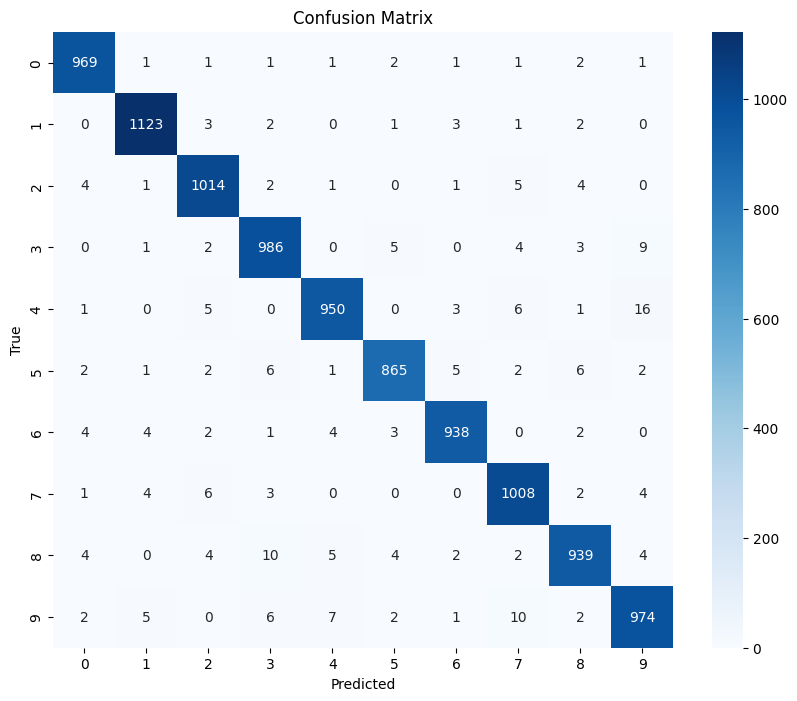

In [85]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Memprediksi label pada data uji
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Membuat confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Visualisasi confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


5. Hasil dan Analisis

a. Akurasi
Setelah melatih model, kita dapat mengharapkan akurasi sekitar 97-98% pada data uji MNIST. Akurasi yang lebih rendah bisa terjadi jika model terlalu sederhana, atau lebih tinggi jika ditingkatkan dengan teknik seperti dropout atau penambahan lapisan.

b. Confusion Matrix
Confusion matrix memberikan gambaran lebih mendetail tentang performa model, terutama pada kelas mana model lebih sering melakukan kesalahan prediksi.

Misalnya, jika angka 5 sering diprediksi sebagai 6, kita bisa melihat ini dengan jelas pada confusion matrix, sehingga kita bisa melakukan penyesuaian pada model.

6. Kesimpulan

ANN dengan dua lapisan tersembunyi dan fungsi aktivasi ReLU dapat memberikan performa yang baik untuk klasifikasi MNIST. Beberapa faktor yang dapat mempengaruhi performa:

Penambahan lapisan atau jumlah neuron dapat meningkatkan kapasitas model.
Dropout atau regularization bisa digunakan untuk mencegah overfitting.
Dengan akurasi tinggi pada dataset MNIST dan analisis confusion matrix, model ini memberikan hasil yang baik dalam mendeteksi angka secara otomatis.